Source:
https://jakevdp.github.io/PythonDataScienceHandbook/02.09-structured-data-numpy.html

In [177]:
import numpy as np
import time
from datetime import datetime
import logging

###

L = logging.getLogger(__name__)


###

name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [3]:
x = np.zeros(4, dtype=int)

# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names': ('name', 'age', 'weight'),
                          'formats': ('U10', 'i4', 'f8')})
print(data.dtype)
print(data)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]
[('', 0, 0.) ('', 0, 0.) ('', 0, 0.) ('', 0, 0.)]


In [4]:
# fill
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [5]:
# Get all names
data['name']


array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [6]:
# Get first row of data
data[0]

('Alice', 25, 55.)

In [7]:
# Get the name from the last row
data[-1]['name']

'Doug'

Using Boolean masking, this even allows you
to do some more sophisticated operations such as filtering on age:

In [70]:
# Get names where age is under 30
data[data['age'] < 30]['name']


array(['Alice', 'Doug'], dtype='<U10')

In [92]:
img_data = np.zeros(1, dtype={'names': ('name', 'image'),
                          'formats': ('U10', np.ubyte)})
                          # 'formats': ('U10', 'B')})
                          # 'formats': ('U10', 'b')})
                          # 'formats': ('U10', '|S1')})
                          # 'formats': ('U10', '|S')})
                          # 'formats': ('U10', 'S')})

In [ ]:
img_data.shape

In [94]:
img_data.dtype

dtype([('name', '<U10'), ('image', 'u1')])

>>> len: 6220800


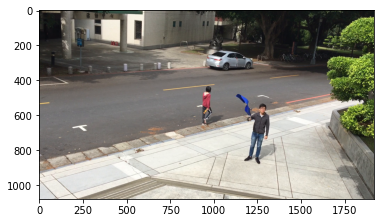

In [220]:
import matplotlib.pyplot as plt
import cv2
root_path = "/home/s010132/devel/eagleeye/data/out1.png"
# root_path = "test.png"
image = cv2.imread(root_path)

# img = cv2.imread(root_path, 3)
# # RGBimage = cv2.cvtColor(BGRimage, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()

b,g,r = cv2.split(image)           # get b, g, r
rgb_img1 = cv2.merge([r,g,b])     # switch it to r, g, b

# plt.subplot(121)
plt.imshow(rgb_img1)
# plt.title('TIGER_COLOR')

bytes_img = image.tobytes()

print(">>> len:", len(bytes_img))

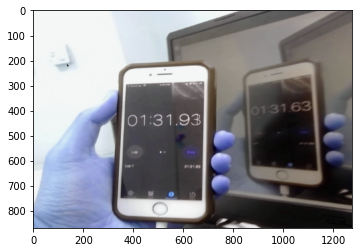

In [199]:
import matplotlib.pyplot as plt
plt.imshow(image)
# from PIL import Image
# import matplotlib.pyplot as plt
# img = Image.fromarray(image, 'RGB')
# img.show()

In [99]:
# img_data['name'] = ["ardi", "kucing"]
img_data['name'] = ["ardi"]
# img_data['image'] = ["img kok"]
img_data['image'] = [bytes_img]
# img_data[1] = b"data"
print(img_data['name'])

ValueError: invalid literal for int() with base 10: b"\x14\x17\x15\x14\x17\x15\x1c\x1f\x1d031;@>DIGKPNINL=B@-20\x1a\x1f\x1f\x19\x1e\x1e\x17\x1d\x1f\x1f%'4;B@GN@FPHNXJS\\?HQ>GPAJSBMVCNWBMVIT]LW`KV_HU^IV_GYbEW`?QZ=OX:OW;PX<NWBT]I[dL^gEW`FXaPbkYktShpOdlK`

In [ ]:
print(img_data['name'])

In [97]:
# print(img_data['image'])

In [ ]:
# img_data['name']
print(img_data['name'])

In [81]:
img_data['image']

array([0], dtype=uint8)

In [117]:
import time
data = [1, False, time.time(), image]
# data = {
# 	"id": 1,
# 	"data": image,
# 	"store_enabled": "False",
# 	"timestamp": time.time()
# }

In [ ]:
print(data[0])

In [121]:
type(data)

list

In [108]:
data = np.array(data)

<ipython-input-108-e78213d150b3>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array(data)


In [112]:
data.shape

(4,)

In [109]:
type(data)

numpy.ndarray

In [ ]:
byte_data = data.tobytes()


In [111]:
byte_data

b' N\x95\x00\x00\x00\x00\x00\xc0\x7f\x90\x00\x00\x00\x00\x00\xb0\xeb\x83?E\x7f\x00\x00`\x17\x80?E\x7f\x00\x00'

In [113]:
deserialized_bytes = np.frombuffer(byte_data)
print(type(deserialized_bytes))
print(deserialized_bytes)
deserialized_img = np.reshape(deserialized_bytes, newshape=(4,))

<class 'numpy.ndarray'>
[4.83436515e-317 4.67874633e-317 6.91372713e-310 6.91372712e-310]


In [114]:
deserialized_img[0]

4.834365e-317

In [187]:
t0_publish = time.time()
img_1d = image.reshape(1, -1)
t1_publish = (time.time() - t0_publish) * 1000
L.warning(('\n[%s] Latency Reshape (%.3f ms) \n' % (datetime.now().strftime("%H:%M:%S"), t1_publish)))


[22:58:27] Latency Reshape (0.096 ms) 



In [191]:
# revert back into 3 channels
# img_3d = np.reshape(img_1d, shape=(1080, 1920, 3))
t0_publish = time.time()
img_3d = img_1d.reshape(1080, 1920, 3)
t1_publish = (time.time() - t0_publish) * 1000
L.warning(('\n[%s] Latency Reshape BACK (%.3f ms) \n' % (datetime.now().strftime("%H:%M:%S"), t1_publish)))

print(img_3d.shape)


[22:59:18] Latency Reshape BACK (0.097 ms) 



(1080, 1920, 3)


In [179]:
img_3d.shape

NameError: name 'img_3d' is not defined

In [189]:
img_1d.shape

(1, 6220800)

In [221]:
import numpy as np
data = [('Ardi', img_1d)]
table = np.array(data, dtype=[('nama', 'U10'),
                               ('image', [('pixel', 'i')], (1,6220800))
                              ])

print(table.shape)
print(table["nama"])
print(table["image"].shape)
print(table["image"]["pixel"][0].shape)
img_ori = table["image"]["pixel"][0].reshape(1080, 1920, 3)
print(img_ori.shape)

(1,)
['Ardi']
(1, 1, 6220800)
(1, 6220800)
(1080, 1920, 3)


In [214]:
# Coba to bytes
bytes_table = table.tobytes()
print("SHAPE:", table.shape)
print(type(bytes_table))

SHAPE: (1,)
<class 'bytes'>


In [215]:
# balikin ...
deserialized_bytes = np.frombuffer(bytes_table, dtype=[('nama', 'U10'),
                               ('image', [('pixel', 'i')], (1,6220800))
                              ])
print(type(deserialized_bytes))
print(deserialized_bytes)
# deserialized_img = np.reshape(deserialized_bytes, newshape=(1080, 1920, 3))


<class 'numpy.ndarray'>


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



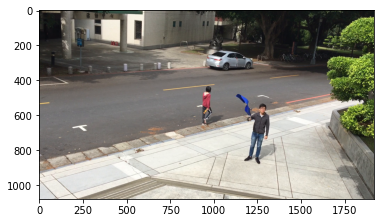

In [222]:
import matplotlib.pyplot as plt
import cv2

b,g,r = cv2.split(img_ori)           # get b, g, r
rgb_img1 = cv2.merge([r,g,b])     # switch it to r, g, b

plt.imshow(rgb_img1)